# INSTACART DATASET

### Import the packages required for analysing the dataset

In [1]:
## Import all the required pacakges.
import os
import sys
import pandas as pd
import numpy as np
from itertools import combinations, groupby
from collections import Counter
from apyori import apriori
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import KMeans #for kmeans algorithm
#For dimensionality reduction.
from sklearn.decomposition import PCA #pca from decomposition module.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import decomposition #decomposition module
#Plotting params.
%matplotlib inline
from pylab import rcParams
import seaborn as sb
rcParams['figure.figsize'] = 12, 4
sb.set_style('whitegrid')

np.random.seed(42) # set the seed to make examples repeatable

### Load the Datasets which are to be processed

In [2]:
## Load the dataset which you need to use
orders_prod_prior = pd.read_csv('D:\\Welingkar\\Trim 5\\IM\\order_products__prior.csv')
aisles = pd.read_csv('D:\\Welingkar\\Trim 5\\IM\\instacart-market-basket-analysis\\aisles.csv\\aisles.csv')
departments = pd.read_csv('D:\\Welingkar\\Trim 5\\IM\\instacart-market-basket-analysis\\departments.csv\\departments.csv')
products = pd.read_csv('D:\\Welingkar\\Trim 5\\IM\\instacart-market-basket-analysis\\products.csv\\products.csv')
orders = pd.read_csv('D:\\Welingkar\\Trim 5\\IM\\instacart-market-basket-analysis\\orders.csv\\orders.csv')
order_products_train = pd.read_csv('D:\\Welingkar\\Trim 5\\IM\\instacart-market-basket-analysis\\order_products__train.csv\\order_products__train.csv')

In [3]:
print("Datatypes of the aisles dataframe:\n",aisles.dtypes)
print("The top 5 rows of aisles dataframe:\n",aisles.head())
print("Count the total number of null values:\n",aisles.isna().sum(axis = 0))

Datatypes of the aisles dataframe:
 aisle_id     int64
aisle       object
dtype: object
The top 5 rows of aisles dataframe:
    aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
Count the total number of null values:
 aisle_id    0
aisle       0
dtype: int64


In [4]:
print("Datatypes of the departments dataframe:\n",departments.dtypes)
print("The top 5 rows of departments dataframe:\n",departments.head())
print("Count the total number of null values:\n",departments.isna().sum(axis = 0))

Datatypes of the departments dataframe:
 department_id     int64
department       object
dtype: object
The top 5 rows of departments dataframe:
    department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
Count the total number of null values:
 department_id    0
department       0
dtype: int64


In [5]:
print("Datatypes of the products dataframe:\n",products.dtypes)
print("The top 5 rows of products dataframe:\n",products.head())
print("Count the total number of null values:\n",products.isna().sum(axis = 0))

Datatypes of the products dataframe:
 product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object
The top 5 rows of products dataframe:
    product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
Count the total number of null values:
 product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


In [6]:
print("Datatypes of the orders dataframe:\n",orders.dtypes)
print("The top 5 rows of orders dataframe:\n",orders.head())
print("Count the total number of null values:\n",orders.isna().sum(axis = 0))
print("Viewing the Prior Order:\n",orders.loc[orders.days_since_prior_order.isna()])

Datatypes of the orders dataframe:
 order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object
The top 5 rows of orders dataframe:
    order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
Count the total number of null values:
 orde

In [7]:
print("Datatypes of the orders_prod_prior dataframe:\n",orders_prod_prior.dtypes)
print("The top 5 rows of orders_prod_prior dataframe:\n",orders_prod_prior.head())
print("Count the total number of null values:\n",orders_prod_prior.isna().sum(axis = 0))

Datatypes of the orders_prod_prior dataframe:
 order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object
The top 5 rows of orders_prod_prior dataframe:
    order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
Count the total number of null values:
 order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


### Exploratory Data Analysis and Visualization

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Order Count Across Hour Of The Day')]

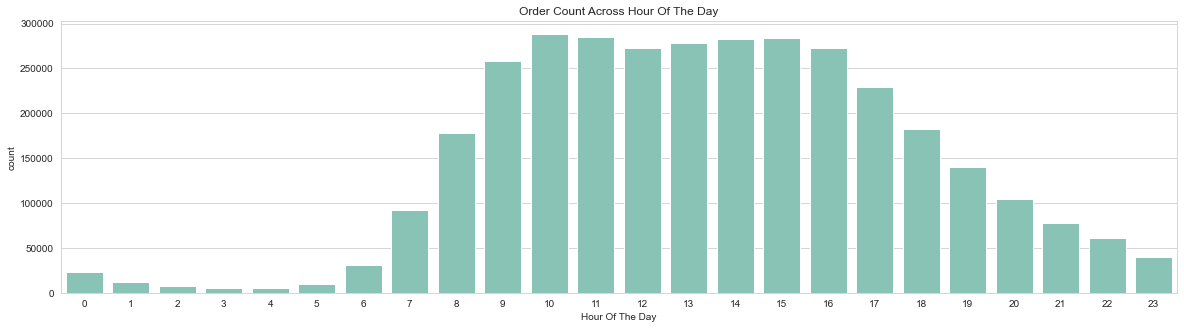

In [8]:
#Exploring each dataset separately to gain insights from it
#1. When do people order
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.countplot(data=orders,x="order_hour_of_day",ax=ax,color="#7fcdbb")
ax.set(xlabel='Hour Of The Day',title="Order Count Across Hour Of The Day")

[Text(0.5, 0, 'Day Of The Week'),
 Text(0.5, 1.0, 'Order Count Across Days Of The Week')]

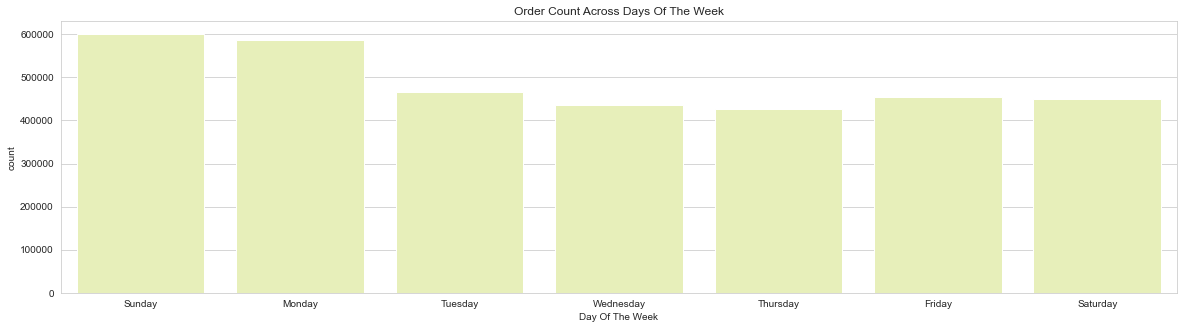

In [9]:
#2. At what day of the week people order

fig,ax = plt.subplots()
fig.set_size_inches(20,5)
ordersDay = orders[["order_dow"]].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

sn.countplot(color="#edf8b1",data=ordersDay,x="order_dow",ax=ax,order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
ax.set(xlabel='Day Of The Week',title="Order Count Across Days Of The Week")

[Text(0.5, 0, 'Hour Of The Day'), Text(0.5, 1.0, 'Reorder Count')]

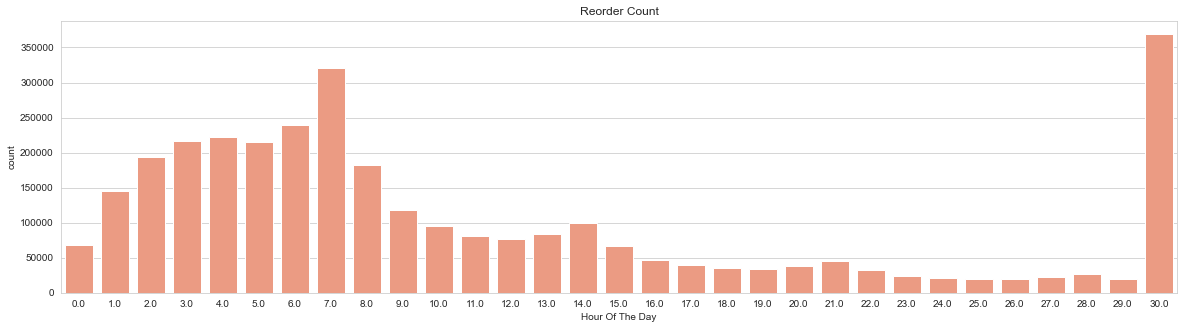

In [10]:
#3.When do people generally reorder
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.countplot(color="#fc9272",data=orders,x="days_since_prior_order",ax=ax)
ax.set(xlabel='Hour Of The Day',title="Reorder Count")

[Text(0.5, 0, 'Order Count'), Text(0.5, 1.0, 'Order Count')]

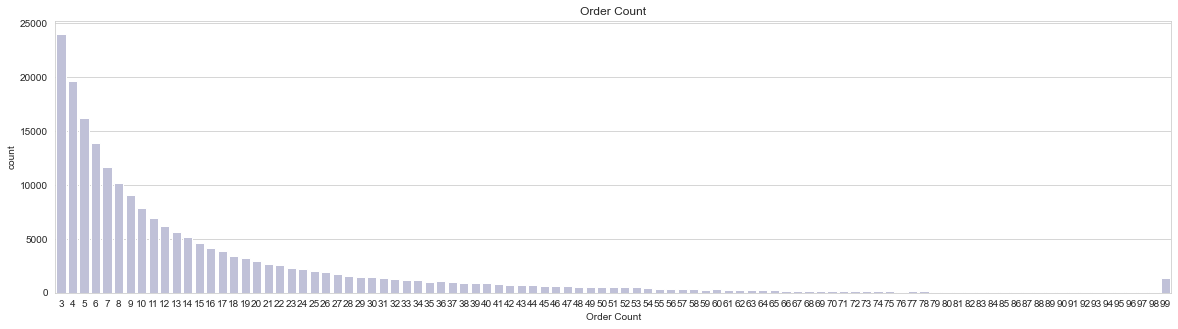

In [11]:
#4. How many orders users have made in general?
orderCount = orders[orders["eval_set"]=="prior"].groupby(by=["user_id"])["order_id"].count().to_frame()
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.countplot(color="#bcbddc",data=orderCount,x="order_id",ax=ax)
ax.set(xlabel='Order Count',title="Order Count")

In [12]:
## Droping column for further pre rpocessing
orders.drop('eval_set', axis = 1, inplace = True)

[Text(0.5, 0, 'Order Count'),
 Text(0.5, 1.0, 'Count Of Items People Buy In Prior')]

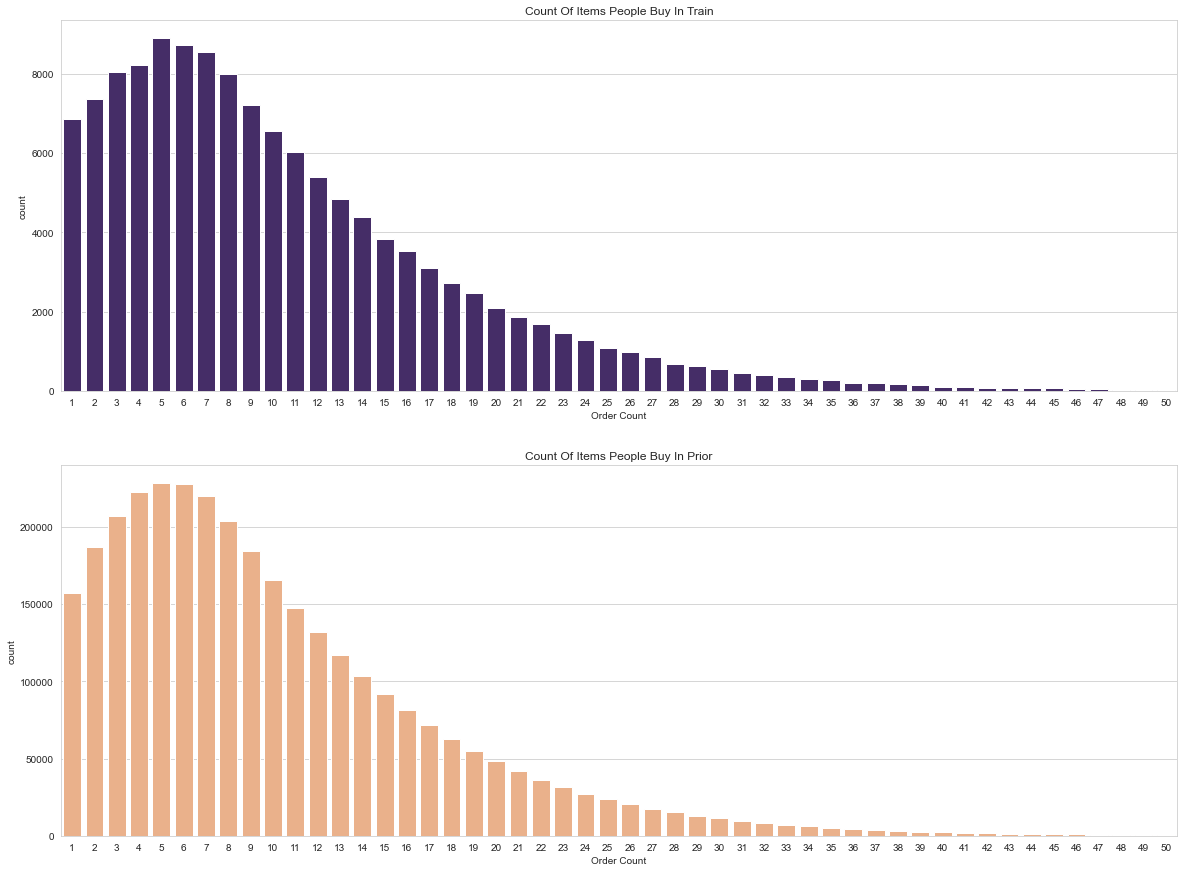

In [13]:
#5. How many items people bought in in prior and train
fig,(ax1,ax2) = plt.subplots(nrows=2)
fig.set_size_inches(20,15)
orderCountsPrior = orders_prod_prior.groupby("order_id")["product_id"].count().to_frame()["product_id"].value_counts().to_frame()
orderCountsPrior["count"] = orderCountsPrior["product_id"]
orderCountsPrior["no_of_products"] = orderCountsPrior.index
orderCountsTrain = order_products_train.groupby("order_id")["product_id"].count().to_frame()["product_id"].value_counts().to_frame()
orderCountsTrain["count"] = orderCountsTrain["product_id"]
orderCountsTrain["no_of_products"] = orderCountsTrain.index
sn.barplot(data=orderCountsTrain.head(50),x="no_of_products",y="count",ax=ax1,color='#432371')
sn.barplot(data=orderCountsPrior.head(50),x="no_of_products",y="count",ax=ax2,color="#FAAE7B")
ax1.set(xlabel='Order Count',title="Count Of Items People Buy In Train")
ax2.set(xlabel='Order Count',title="Count Of Items People Buy In Prior")

,product_id,count,product_name,aisle_id,department_id
0,24852,18726,Banana,24,4
1,13176,15480,Bag of Organic Bananas,24,4
2,21137,10894,Organic Strawberries,24,4
3,21903,9784,Organic Baby Spinach,123,4
4,47626,8135,Large Lemon,24,4
5,47766,7409,Organic Avocado,24,4
6,47209,7293,Organic Hass Avocado,24,4
7,16797,6494,Strawberries,24,4
8,26209,6033,Limes,24,4
9,27966,5546,Organic Raspberries,123,4


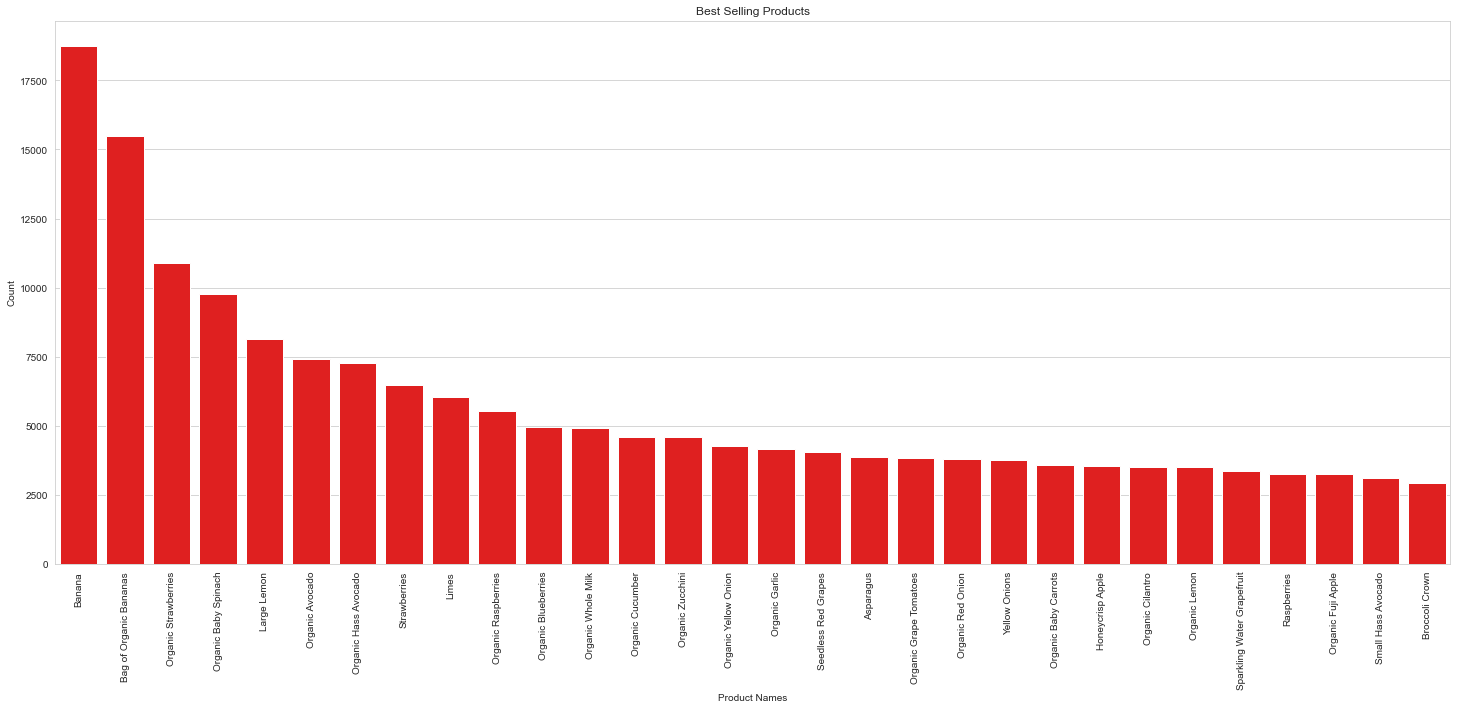

In [14]:
#6. Best selling products
productsCount = order_products_train["product_id"].value_counts().to_frame()
productsCount["count"] = productsCount.product_id
productsCount["product_id"] = productsCount.index
mergedData = pd.merge(productsCount,products,how="left",on="product_id").sort_values(by="count",ascending=False)

fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sn.barplot(data=mergedData.head(30),x="product_name",y="count",ax=ax,orient="v",color= "r")
ax.set(xlabel='Product Names',ylabel="Count",title="Best Selling Products")
plt.xticks(rotation=90)

mergedData.head(10)

,product_id,count,reordered_count,reordered_ratio,product_name,aisle_id,department_id
0,43334,1,1.0,1.0,Classics Hot Cocoa Mix Variety Pack,90,7
1,24324,1,1.0,1.0,Vitamin B-12 1000 mcg,47,11
2,3171,2,2.0,1.0,Beef Raviolis Pasta in Meat Sauce,59,15
3,20611,2,2.0,1.0,3 Ply Wheat Straw Bath Tissue,54,17
4,47221,2,2.0,1.0,Premium Roast Decaf K Cup,26,7
5,98,2,2.0,1.0,2% Yellow American Cheese,2,16
6,28558,2,2.0,1.0,Organic Irish Breakfast Black Tea,94,7
7,27354,2,2.0,1.0,Authentic Asia Shrimp Wonton Soup With Noodles,38,1
8,9361,2,2.0,1.0,Healthy Indulgence Salmon & Chicken Cat Food,41,8
9,26851,2,2.0,1.0,Chew-Lotta Long Lasting Chewbone Dog Snacks,40,8


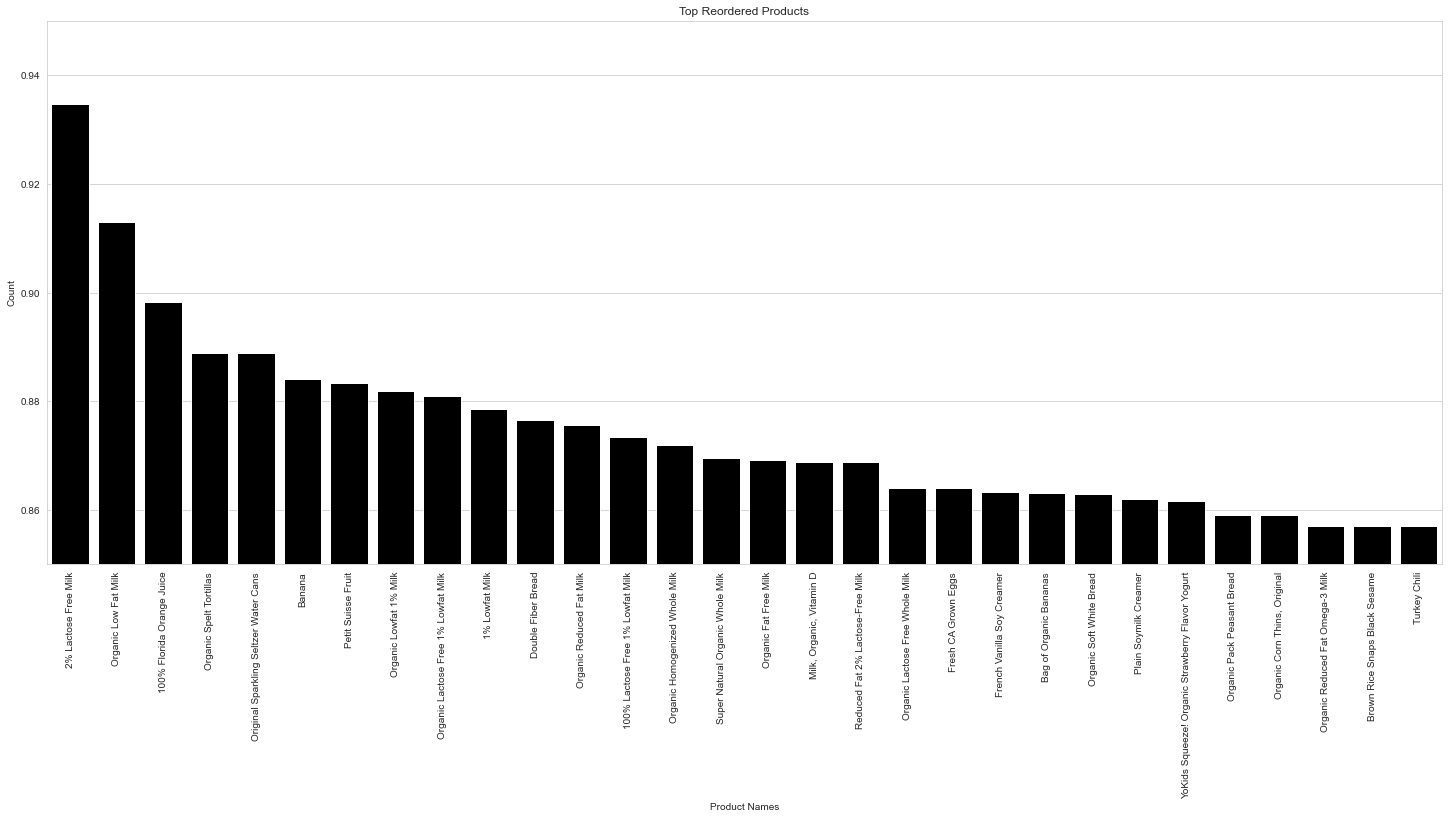

In [15]:
#7. Top reordered products
productsCountReordered = order_products_train[order_products_train["reordered"]==1]["product_id"].value_counts().to_frame()
productsCountReordered["reordered_count"] = productsCountReordered.product_id
productsCountReordered["product_id"] = productsCountReordered.index
productCountReorderedMerged = pd.merge(productsCount,productsCountReordered,how="left",on="product_id").sort_values(by="count",ascending=False)
productCountReorderedMerged["reordered_ratio"] = productCountReorderedMerged["reordered_count"]/productCountReorderedMerged["count"]
productCountReorderedMerged.sort_values(by="reordered_ratio",ascending=False,inplace=True)
productMerged = pd.merge(productCountReorderedMerged,products,how="left",on="product_id")

fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sn.barplot(data=productMerged[productMerged["count"]>40].head(30),x="product_name",y="reordered_ratio",color="k",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Top Reordered Products")
ax.set_ylim(0.85,.95)
plt.xticks(rotation=90)

productMerged.head(10)

,product_id,count,reordered_count,first_ordered_ratio,product_name,aisle_id,department_id
0,39239,1,1.0,1.0,Singapore Street Classic Curry Noodles,66,6
1,4611,1,1.0,1.0,Fair Trade Blackberry Premium Spread,88,13
2,34443,1,1.0,1.0,Clary Sage Essential Oil,101,17
3,10665,1,1.0,1.0,3 cup Glass Tupperware with Lid,85,17
4,19740,1,1.0,1.0,Daily Moisture Quench Beauty Bar Soap,127,11
5,10515,1,1.0,1.0,100% Pure Organic Maple Syrup Grade B Dark & D...,29,13
6,14997,1,1.0,1.0,Long Hammer IPA Beer,27,5
7,6433,1,1.0,1.0,Raw Veggie Wrappers,13,20
8,1686,1,1.0,1.0,Thai Style Spring Rolls with Sweet & Sour Sauce,129,1
9,45697,1,1.0,1.0,Ultra Strong Hold Full Control Non-Aerosol Hai...,22,11


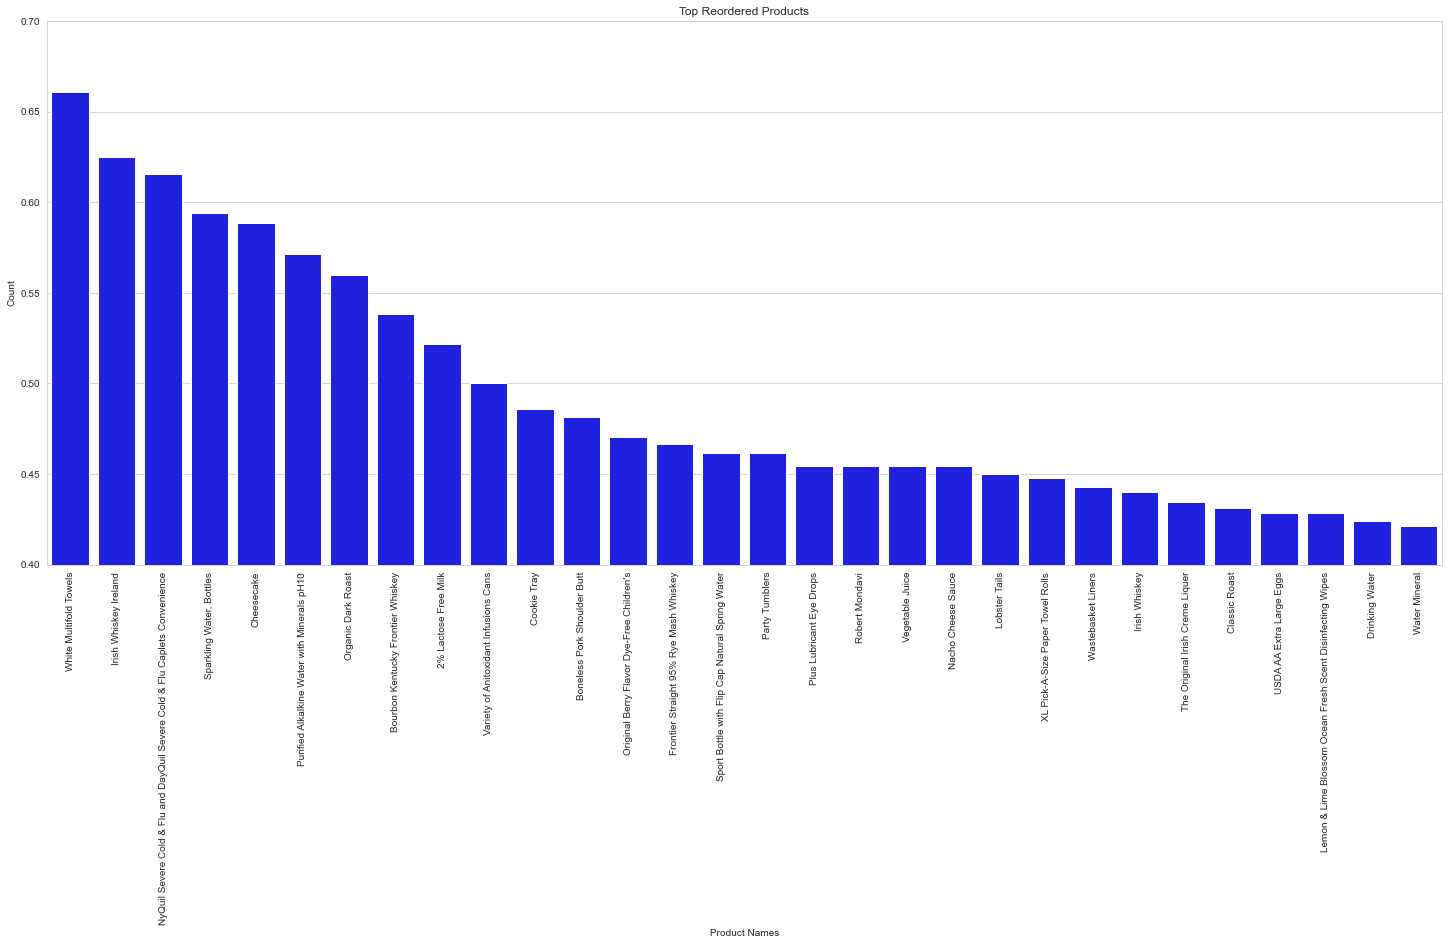

In [16]:
#8. Top items that are put into the cart first generally
productsCountFirst = order_products_train[order_products_train["add_to_cart_order"]==1]["product_id"].value_counts().to_frame()
productsCountFirst["reordered_count"] = productsCountFirst.product_id
productsCountFirst["product_id"] = productsCountFirst.index
productCountFirstMerged = pd.merge(productsCount,productsCountFirst,how="left",on="product_id").sort_values(by="count",ascending=False)
productCountFirstMerged["first_ordered_ratio"] = productCountFirstMerged["reordered_count"]/productCountFirstMerged["count"]
productCountFirstMerged.sort_values(by="first_ordered_ratio",ascending=False,inplace=True)
firstMerged = pd.merge(productCountFirstMerged,products,how="left",on="product_id")
fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sn.barplot(data=firstMerged[firstMerged["count"]>10].head(30),x="product_name",y="first_ordered_ratio",color="b",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Top Reordered Products")
ax.set_ylim(0.4,.7)
plt.xticks(rotation=90)

firstMerged.head(10)

In [17]:
#Put them in a list to print shape.
combined_df_list = [products,orders, departments, aisles, orders_prod_prior, order_products_train]

In [18]:
## Getting Order Users
orders_apriori = orders.copy()
orders_user = orders.groupby('user_id')['order_number'].max() #it takes the maximum number of orders placed
orders_user.head()

user_id
1    11
2    15
3    13
4     6
5     5
Name: order_number, dtype: int64

In [19]:
## Getting Order Id and Order Size
products_user = orders[['order_id', 'user_id']].merge(
    orders_prod_prior[['order_id', 'add_to_cart_order']].groupby('order_id').max().rename({'add_to_cart_order': 'order_size'}, axis = 1),
                                                                                        on = 'order_id')
print(products_user)

         order_id  user_id  order_size
0         2539329        1           5
1         2398795        1           6
2          473747        1           5
3         2254736        1           5
4          431534        1           8
...           ...      ...         ...
3214869   2558525   206209           3
3214870   2266710   206209           9
3214871   1854736   206209           8
3214872    626363   206209          20
3214873   2977660   206209           9

[3214874 rows x 3 columns]


In [20]:
## Getting Product Users
products_user = products_user.drop('order_id', axis = 1).groupby('user_id')['order_size'].sum()
products_user

user_id
1          59
2         195
3          88
4          18
5          37
         ... 
206205     32
206206    285
206207    223
206208    677
206209    129
Name: order_size, Length: 206209, dtype: int64

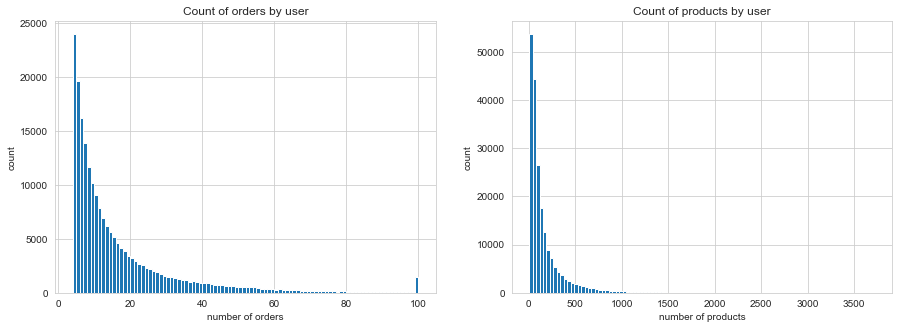

In [21]:
#9. Plot for count of orders by users and orders by product
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].hist(orders_user, bins = max(orders_user) - min(orders_user))
ax[0].set_title('Count of orders by user')
ax[0].set_xlabel('number of orders')
ax[0].set_ylabel('count')

ax[1].hist(products_user, bins = 100)
ax[1].set_title('Count of products by user')
ax[1].set_xlabel('number of products')
ax[1].set_ylabel('count');

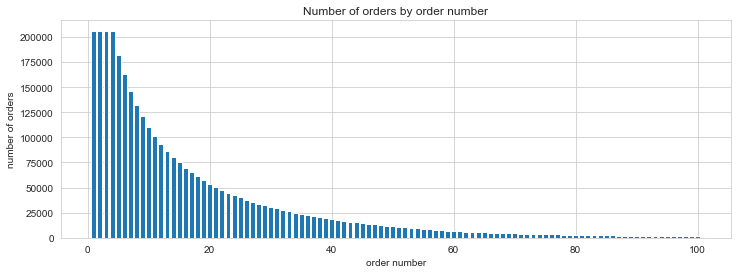

In [22]:
#10. Bar graph of Orders by Order Number
orders_by_order_number = orders.order_number.value_counts()
plt.bar(orders_by_order_number.index, orders_by_order_number)
plt.title('Number of orders by order number')
plt.xlabel('order number')
plt.ylabel('number of orders');

In [23]:
##Total orders per day of the week:

orders_by_dow = orders.order_dow.value_counts()
orders_by_dow

0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64

In [24]:
##Total products per day of the week:

products_by_dow = orders[['order_id', 'order_dow']].merge(
    orders_prod_prior[['order_id', 'add_to_cart_order']].groupby('order_id').max().rename({'add_to_cart_order': 'order_size'}, axis = 1),
    on = 'order_id')
products_by_dow = products_by_dow.drop('order_id', axis=1).groupby('order_dow')['order_size'].sum()
products_by_dow

order_dow
0    6209666
1    5665856
2    4217798
3    3844117
4    3787215
5    4209533
6    4500304
Name: order_size, dtype: int64

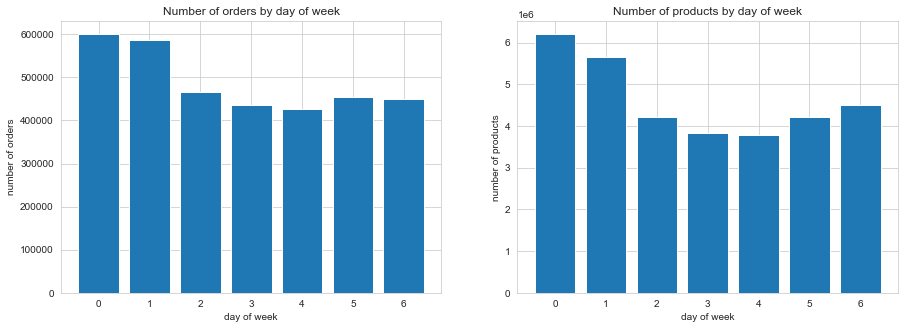

In [25]:
#11. Bar plots of Number of orders by day of week and Number of products by day of week
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(orders_by_dow.index, orders_by_dow)
ax[0].set_title('Number of orders by day of week')
ax[0].set_xlabel('day of week')
ax[0].set_ylabel('number of orders')

ax[1].bar(products_by_dow.index, products_by_dow)
ax[1].set_title('Number of products by day of week')
ax[1].set_xlabel('day of week')
ax[1].set_ylabel('number of products');

In [26]:
## Determining the order by hour
orders_by_hour = orders.order_hour_of_day.value_counts()
orders_by_hour

10    288418
11    284728
15    283639
14    283042
13    277999
12    272841
16    272553
9     257812
17    228795
18    182912
8     178201
19    140569
20    104292
7      91868
21     78109
22     61468
23     40043
6      30529
0      22758
1      12398
5       9569
2       7539
4       5527
3       5474
Name: order_hour_of_day, dtype: int64

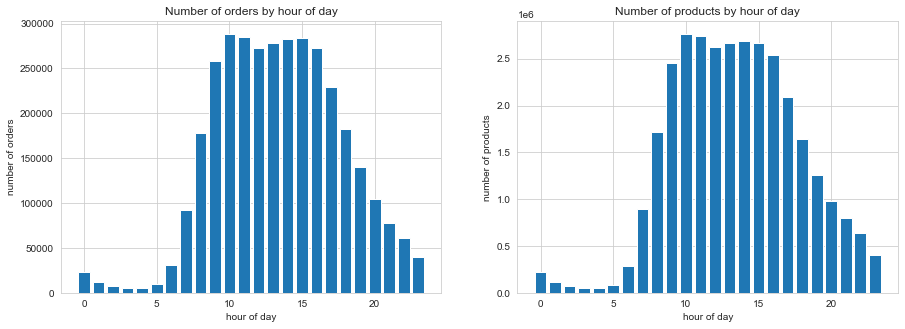

In [27]:
#12. Plot for Number of orders and products by hour of day 
products_by_hour = orders[['order_id', 'order_hour_of_day']].merge(
    orders_prod_prior[['order_id', 'add_to_cart_order']].groupby('order_id').max().rename({'add_to_cart_order': 'order_size'}, axis = 1),
    on = 'order_id')

products_by_hour = products_by_hour.drop('order_id', axis = 1).groupby('order_hour_of_day')['order_size'].sum()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(orders_by_hour.index, orders_by_hour)
ax[0].set_title('Number of orders by hour of day')
ax[0].set_xlabel('hour of day')
ax[0].set_ylabel('number of orders')

ax[1].bar(products_by_hour.index, products_by_hour)
ax[1].set_title('Number of products by hour of day')
ax[1].set_xlabel('hour of day')
ax[1].set_ylabel('number of products');

C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


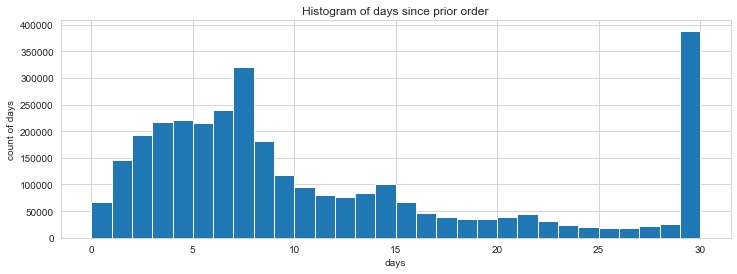

In [28]:
#13. Histogram of days since prior order
plt.hist(orders.days_since_prior_order, bins = 30)
plt.title('Histogram of days since prior order')
plt.xlabel('days')
plt.ylabel('count of days');

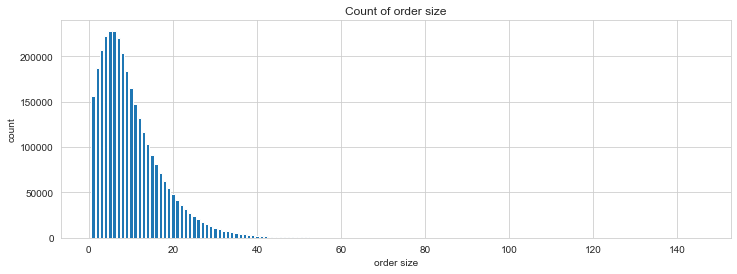

In [29]:
#14. Plot for the count of order size
cart_size = orders_prod_prior.groupby('order_id')['add_to_cart_order'].max()
cart_size = cart_size.value_counts()
plt.bar(cart_size.index, cart_size)
plt.title('Count of order size')
plt.xlabel('order size')
plt.ylabel('count');

In [30]:
## Determining the transactions
transactions_df = orders_prod_prior[['order_id', 'product_id']][:5000]
transactions_df

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035
...,...,...
4995,528,40897
4996,528,22182
4997,528,44799
4998,529,41844


In [31]:
## Finding out the total orders list and the total products list
n_orders = len(set(transactions_df.order_id))
n_products = len(set(transactions_df.product_id))
print(n_orders, n_products)

499 2809


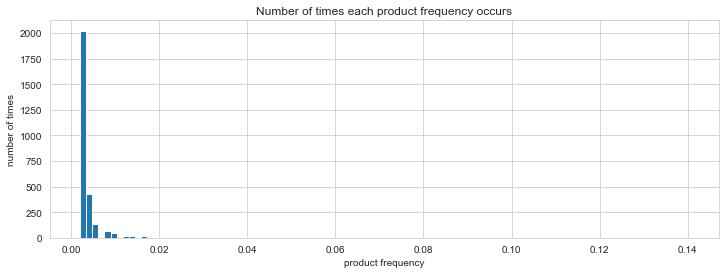

In [32]:
#15. Plot for the Number of times each product occurs
product_frequency = transactions_df.product_id.value_counts() / n_orders
plt.hist(product_frequency, bins = 100)
plt.title('Number of times each product frequency occurs')
plt.xlabel('product frequency')
plt.ylabel('number of times');

In [33]:
## Apriori Products
min_support = 0.01
products_apriori = product_frequency[product_frequency >= min_support]
print(products_apriori)

24852    0.140281
13176    0.120240
21903    0.078156
21137    0.064128
47209    0.064128
           ...   
12276    0.010020
35503    0.010020
31343    0.010020
40332    0.010020
41658    0.010020
Name: product_id, Length: 149, dtype: float64


In [34]:
## Apriori Transcations
transactions_apriori = transactions_df[transactions_df.product_id.isin(products_apriori.index)]
transactions_apriori

,order_id,product_id
0,2,33120
1,2,28985
5,2,17794
10,3,24838
12,3,21903
...,...,...
4975,526,1940
4982,527,49235
4988,527,21903
4989,527,35939


In [35]:
## Determining the order size of each transaction
order_sizes = transactions_apriori.order_id.value_counts()
order_sizes

431    15
493    15
265    14
426    14
359    13
       ..
161     1
446     1
301     1
167     1
342     1
Name: order_id, Length: 399, dtype: int64

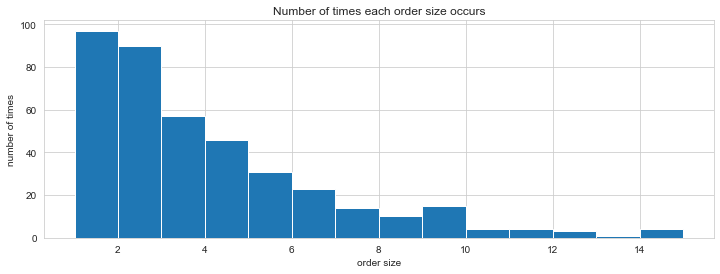

In [36]:
#16. Histograms for the number of times each order size has occured
plt.hist(order_sizes, bins = max(order_sizes) - min(order_sizes))
plt.title('Number of times each order size occurs')
plt.xlabel('order size')
plt.ylabel('number of times');

# Principal Component Analysis

In [37]:
#Check the size of the datasets.
for i in combined_df_list:
    print (i.shape)
#There are two df's which are very large in size, subset to use it on local machine with limited compute power.
del combined_df_list

(49688, 4)
(3421083, 6)
(21, 2)
(134, 2)
(32434489, 4)
(1384617, 4)


In [38]:
#Products Dataframe
products.head(2)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13


In [39]:
#Departments Dataframe
departments.head(2)

,department_id,department
0,1,frozen
1,2,other


In [40]:
#Aisles Dataframe - Products are kept in aisles.
aisles.head(2)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses


In [41]:
#Orders Dataframe
orders.head(2)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0


In [42]:
#Orders Train Dataframe
order_products_train.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1


In [43]:
#Products in Orders (Prior) - These files specify which products were purchased in each order. Contains Previous Orders.
orders_prod_prior.head(2) #notice the reordered feature.

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


In [44]:
#Since the dataframe is too big for in memory computation, reducing prior to only 500k rows. 
orders_prod_prior = orders_prod_prior [:500000]

In [45]:
#Merge 1 - Prior and Orders DF (Joining Orders to prior df)
#Combining the Prior and Orders dataframe - shows which user ordered what products and in which order.
df1 = pd.merge(orders_prod_prior, orders, on= 'order_id')
df1.head(2)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,3,5,9,8.0
1,2,28985,2,1,202279,3,5,9,8.0


In [46]:
#Merge 2
#Combining the department and aisle df's to product df. 
prod_aisles = pd.merge(products, aisles, on = 'aisle_id')
df2 = pd.merge(prod_aisles, departments, on = 'department_id')
df2.head(2)

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks


In [47]:
#Combining df1 anf df2
combined_df = pd.merge(df1, df2, on = 'product_id').reset_index(drop=True)
combined_df.head(2)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,0,153404,2,0,16,7.0,Organic Egg Whites,86,16,eggs,dairy eggs


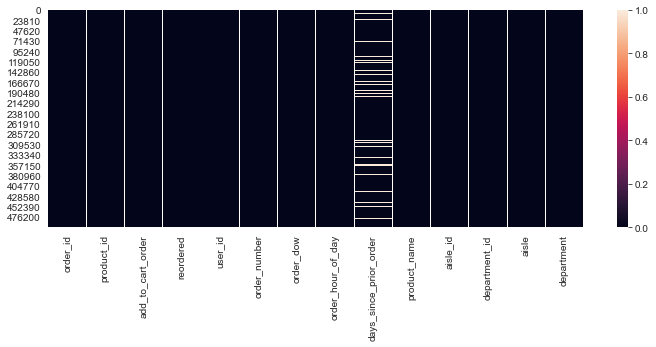

In [48]:
#Check Nulls
sb.heatmap(combined_df.isnull(), cbar=True)

In [49]:
#These are null values in the feature 'days_since_prior_order'
combined_df[combined_df['days_since_prior_order'].isnull()].head(2)

#To be dealt with later, as this does not influence the current scope of work.

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
39,5733,33120,8,0,92179,1,6,10,NaN,Organic Egg Whites,86,16,eggs,dairy eggs
53,8762,33120,4,0,68183,1,3,8,NaN,Organic Egg Whites,86,16,eggs,dairy eggs


In [50]:
#Most ordering customer. Favourite Customer?
pd.DataFrame(combined_df.groupby('user_id')['product_id'].count()).sort_values('product_id', ascending=False).head(2)

,product_id
user_id,
142131,176
169550,161


In [51]:
#Most sold items as per aisle.
pd.DataFrame(combined_df['aisle'].value_counts()).head(5)

,aisle
fresh fruits,56326
fresh vegetables,52073
packaged vegetables fruits,27347
yogurt,22485
packaged cheese,14960


In [52]:
combined_df.shape

(500000, 14)

In [53]:
#Using aisles and user_id. This shows the users that purchased items from which aisle.
user_by_aisle_df = pd.crosstab(combined_df['user_id'], combined_df['aisle'])
user_by_aisle_df.head(2)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [54]:
#The final dataframe has about 134 features.
user_by_aisle_df.shape

(39834, 134)

In [55]:
#Standardization is not needed in this case.
user_by_aisle_df.describe() #this confirms that the values dont need to be standardized since they're all 'quantity'.

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
count,39834.000000,39834.000000,39834.000000,39834.000000,39834.000000,39834.000000,39834.000000,39834.000000,39834.000000,39834.000000,...,39834.000000,39834.000000,39834.000000,39834.000000,39834.000000,39834.000000,39834.000000,39834.000000,39834.000000,39834.000000
mean,0.007004,0.067355,0.003113,0.002887,0.149746,0.013632,0.121454,0.008410,0.002109,0.019406,...,0.113320,0.098986,0.051213,0.072526,0.013782,0.013305,0.018000,0.320781,0.011322,0.564468
std,0.102322,0.322399,0.059625,0.057711,0.914706,0.125322,0.458353,0.111384,0.050060,0.248107,...,0.392178,0.517674,0.294278,0.295638,0.131369,0.124048,0.154928,0.801316,0.130455,1.314491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,6.000000,9.000000,4.000000,3.000000,36.000000,3.000000,9.000000,7.000000,2.000000,11.000000,...,7.000000,22.000000,9.000000,6.000000,6.000000,3.000000,6.000000,20.000000,4.000000,47.000000


In [56]:
#Taking array of 'user_by_aisle_df'. To use for elbow method.
X = user_by_aisle_df.values

In [57]:
user_by_aisle_df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,4
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


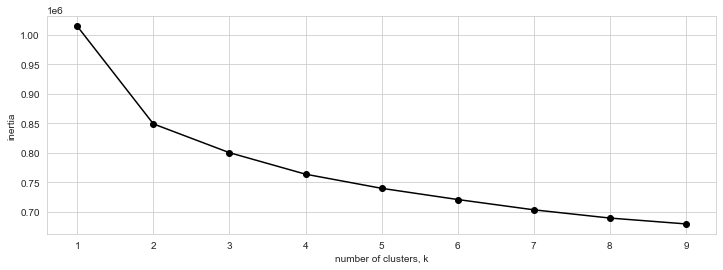

In [58]:
    #Implementing the Elbow method to identify the ideal value of 'k'. 

    ks = range(1,10) #hit and trial, let's try it 10 times.
    inertias = []
    for k in ks:
        model = KMeans(n_clusters=k)    # Create a KMeans instance with k clusters: model
        model.fit(X)                    # Fit model to samples
        inertias.append(model.inertia_) # Append the inertia to the list of inertias

    plt.plot(ks, inertias, '-o', color='black') #Plotting. The plot will give the 'elbow'.
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

In [59]:
#Seeing the above plot, the ideal value for cluster (k) should be between 5 and 6 - since the features beyond these values,
# do not explain much of the variability in the dataset. 

#Decomposing the features into 6 using PCA (seeing the above plot, n_components = 6)
pca = decomposition.PCA(n_components=6)
pca_user_order = pca.fit_transform(X)

#You can do hit and trial here to change the number of components and see how much variation in the data 
#is explained by the chose n_components.

In [60]:
#Checking the % variation explained by the 6 pca components.
pca.explained_variance_ratio_.sum()
#More than half (50%) of the variability in the data can be explained by just 6 components.

0.5179968603456072

Text(0, 0.5, 'variance %')

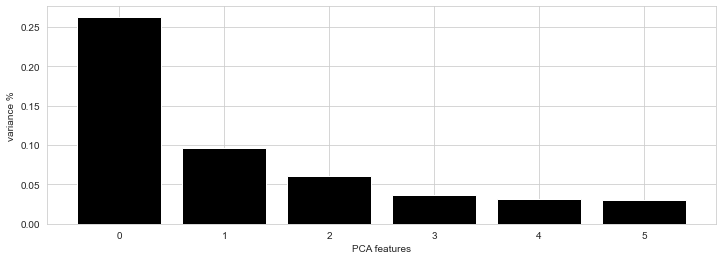

In [61]:
# Plot the explained variances to verify the variation.
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')

#A majority of the variance can be explained by just five to six components. Anything beyond that does not capture much of the variation in the dataset.

# InstaCart Market Basket Analysis

# Association Rule

In [62]:
# Convert from DataFrame to a Series, with order_id as index and item_id as value
orders_prod_prior = orders_prod_prior.set_index('order_id')['product_id'].rename('item_id')
print(orders_prod_prior.head())
print("The type of Orders: ",type(orders_prod_prior))

order_id
2    33120
2    28985
2     9327
2    45918
2    30035
Name: item_id, dtype: int64
The type of Orders:  <class 'pandas.core.series.Series'>


In [63]:
## This function is used to return the frequency of the items and item pairs
def frequency(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("frequency")
    else: 
        return pd.Series(Counter(iterable)).rename("frequency")
    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))

# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().to_numpy()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'frequency': 'frequencyA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'frequency': 'frequencyB', 'support': 'supportB'}), left_on='item_B', right_index=True))

# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','frequencyAB','supportAB','frequencyA','supportA','frequencyB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns] 

In [64]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))

    # Calculate item frequency and support
    item_stats             = frequency(order_item).to_frame("frequency")
    item_stats['support']  = item_stats['frequency'] / order_count(order_item) * 100

    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))

    # Filter from order_item orders with less than 2 items
    order_size             = frequency(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))

    # Recalculate item frequency and support
    item_stats             = frequency(order_item).to_frame("frequency")
    item_stats['support']  = item_stats['frequency'] / order_count(order_item) * 100

    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)

    # Calculate item pair frequency and support
    item_pairs              = frequency(item_pair_gen).to_frame("frequencyAB")
    item_pairs['supportAB'] = item_pairs['frequencyAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))

    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))

    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)


In [65]:
#%%time
rules = association_rules(orders_prod_prior, 0.01)  

Starting order_item:                 500000
Items with support >= 0.01:           11789
Remaining order_item:                467475
Remaining orders with 2+ items:       46601
Remaining order_item:                464698
Item pairs:                         2160801
Item pairs with support >= 0.01:      62406



In [66]:
# Replace item ID with item name and display association rules
item_name   = pd.read_csv('D:\\Welingkar\\Trim 5\\IM\\instacart-market-basket-analysis\\products.csv\\products.csv')
item_name   = item_name.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
print("The columns in the new dataset are:\n",rules_final.columns)
print("The Dataset is:\n",rules_final)
rules_final.to_csv("Rules_Final.csv")

The columns in the new dataset are:
 Index(['itemA', 'itemB', 'frequencyAB', 'supportAB', 'frequencyA', 'supportA',
       'frequencyB', 'supportB', 'confidenceAtoB', 'confidenceBtoA', 'lift'],
      dtype='object')
The Dataset is:
                                           itemA  \
0      Purina Mixed Grill Classic Pate Cat Food   
1         The Red ONe: Squished Fruit Smoothies   
2                Santa Fe Style Salad Cafe Bowl   
3            Chicken Stew Natural Food for Dogs   
4         Organic Wise Punkin Level 2 Baby Food   
...                                         ...   
11230                      Organic Hass Avocado   
9330                       Organic Strawberries   
503                             Organic Avocado   
2746                                     Banana   
3839                     Bag of Organic Bananas   

                                              itemB  frequencyAB  supportAB  \
0      Liver & Chicken Dinner Classic Pate Cat Food            5   0.010729

# Hierarchical Clustering

In [67]:
# Add averages

temp = pd.merge(left=products,
         right=order_products_train.product_id.value_counts().to_frame('count'), 
         left_index=True, right_index=True)

temp = pd.merge(left=temp, 
                    right=pd.DataFrame(order_products_train.groupby('product_id').reordered.sum().to_frame(), dtype='int64'),  
                    left_index=True, right_index=True)

temp['reorder_rate'] = temp['reordered']/temp['count']

temp = pd.merge(left=temp, 
                right=order_products_train.groupby('product_id').add_to_cart_order.mean().to_frame('add_to_cart_mean'),
                left_index=True, right_index=True)

temp = pd.merge(left=temp, 
                right=pd.merge(left=order_products_train, 
                               right=orders[['order_dow', 'order_hour_of_day', 'days_since_prior_order']], 
                               left_on='order_id', right_index=True).groupby('product_id').order_dow.mean().to_frame(),
                left_index=True, right_index=True)

temp = pd.merge(left=temp, 
                right=pd.merge(left=order_products_train, 
                               right=orders[['order_dow', 'order_hour_of_day', 'days_since_prior_order']], 
                               left_on='order_id', right_index=True).groupby('product_id').order_hour_of_day.mean().to_frame(),
                left_index=True, right_index=True)

temp = pd.merge(left=temp, 
                right=pd.merge(left=order_products_train, 
                               right=orders[['order_dow', 'order_hour_of_day', 'days_since_prior_order']], 
                               left_on='order_id', right_index=True).groupby('product_id').days_since_prior_order.mean().to_frame(),
                left_index=True, right_index=True)
display(temp.head())
temp.shape

,product_id,product_name,aisle_id,department_id,count,reordered,reorder_rate,add_to_cart_mean,order_dow,order_hour_of_day,days_since_prior_order
1,2,All-Seasons Salt,104,13,76,49,0.644737,6.921053,2.868421,14.236842,11.547945
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4,1,0.250000,15.750000,3.000000,13.000000,10.500000
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,6,6,1.000000,4.500000,2.833333,15.333333,7.833333
4,5,Green Chile Anytime Sauce,5,13,22,14,0.636364,8.954545,3.045455,15.045455,9.500000
5,6,Dry Nose Oil,11,11,1,1,1.000000,5.000000,4.000000,9.000000,15.000000


(39122, 11)

In [68]:
## Remove all the products with less than 11 orders
temp = temp[temp['count'] > 10]
temp.shape

(13377, 11)

In [69]:
## Scaling with standard scaler
temp.drop(['product_name', 'department_id', 'aisle_id', 'reordered'], axis=1, inplace=True)
scaler = StandardScaler()
temp_scaled = scaler.fit_transform(temp)

In [70]:
## Plot the dendograms
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    plt.figure(figsize=(15,10))
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

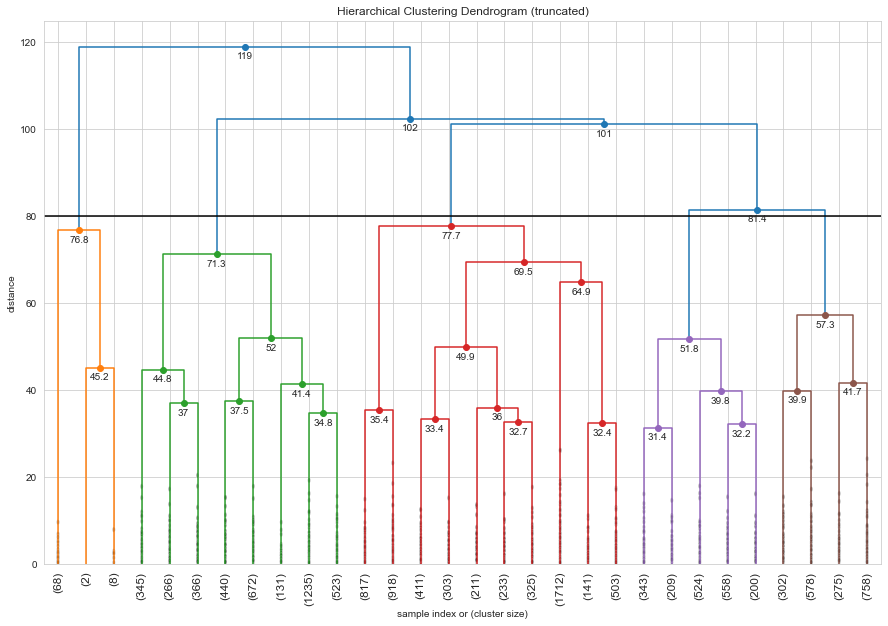

In [71]:
## Plot dendogram for standard scaler
linked_array = ward(temp_scaled)
fancy_dendrogram(linked_array, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10, max_d=80)
plt.show()

In [72]:
print('Distances for the last 5 merges:\n{}'.format(linked_array[-5:,2]))

Distances for the last 5 merges:
[ 77.73051854  81.44870887 101.18222138 102.42757101 118.99965813]


In [73]:
## Determine the total number of clusters and the elements of each cluster and the percetage of reorder frequency
max_d = 80
clusters = fcluster(linked_array, max_d, criterion='distance')
labels, counts = np.unique(clusters, return_counts=True)
temp['clusters'] = clusters
print('reorder rates for each cluster\n')
for i in range(1,len(np.unique(clusters))+1):
    print('\nlabel: {}'.format(i))
    print('n: {}'.format(counts[i-1]))
    print('rr: {}'.format(round(temp[temp['clusters'] == i].reorder_rate.mean()*100, 2))) 

reorder rates for each cluster


label: 1
n: 78
rr: 70.89

label: 2
n: 3978
rr: 59.48

label: 3
n: 5574
rr: 52.09

label: 4
n: 1834
rr: 38.57

label: 5
n: 1913
rr: 44.8


In [74]:
## Displaying the results o the clusters formed
display(temp[clusters == 1])

,product_id,count,reorder_rate,add_to_cart_mean,order_dow,order_hour_of_day,days_since_prior_order,clusters
4605,4606,3762,0.677299,8.417331,2.780702,13.429825,10.884898,1
4920,4921,4059,0.706824,8.346883,2.789603,13.439517,11.243717,1
5077,5078,2298,0.762402,7.596171,2.758050,13.360313,10.961111,1
5450,5451,3103,0.705446,7.341283,2.689977,13.325814,11.319740,1
5876,5877,3505,0.716120,8.381455,2.765193,13.366619,11.402365,1
...,...,...,...,...,...,...,...,...
47626,47627,8135,0.728089,8.063307,2.767056,13.457283,11.216387,1
47766,47767,7409,0.840329,6.417735,2.778783,13.510595,11.166619,1
48679,48680,2568,0.653816,9.731698,2.751558,13.556075,11.023554,1
49235,49236,2646,0.804611,6.317460,2.763794,13.411565,10.990696,1


In [75]:
label = 3
print('reorder rate for cluster {0}: {1}'.format(label, round(temp[temp['clusters'] == label].reorder_rate.mean()*100,2)))
pd.merge(right=temp[temp['clusters'] == label], left=products, left_index=True, right_index=True).head()

reorder rate for cluster 3: 52.09


,product_id_x,product_name,aisle_id,department_id,product_id_y,count,reorder_rate,add_to_cart_mean,order_dow,order_hour_of_day,days_since_prior_order,clusters
1,2,All-Seasons Salt,104,13,2,76,0.644737,6.921053,2.868421,14.236842,11.547945,3
4,5,Green Chile Anytime Sauce,5,13,5,22,0.636364,8.954545,3.045455,15.045455,9.500000,3
8,9,Light Strawberry Blueberry Yogurt,120,16,9,13,0.538462,9.846154,3.000000,14.846154,7.615385,3
10,11,Peach Mango Juice,31,7,11,119,0.588235,8.285714,3.033613,13.815126,11.530435,3
23,24,Tri-Vi-Sol® Vitamins A-C-and D Supplement Drop...,47,11,24,70,0.528571,11.985714,2.971429,13.742857,10.184615,3


In [76]:
## Robust Scaler
temp.drop('clusters', axis=1, inplace=True)
robust_scaler = RobustScaler()
temp_robust = robust_scaler.fit_transform(temp)

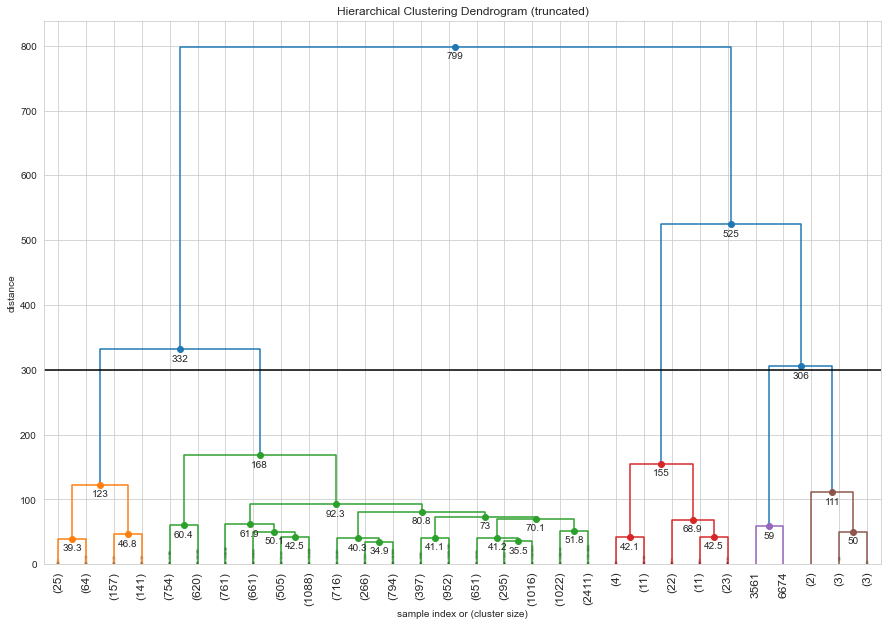

In [77]:
linked_array = ward(temp_robust)
fancy_dendrogram(linked_array, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10, max_d=300)
plt.show()

In [78]:
## Determine the total number of clusters and the elements of each cluster and the percetage of reorder frequency
max_d = 300
clusters = fcluster(linked_array, max_d, criterion='distance')
labels, counts = np.unique(clusters, return_counts=True)
temp['clusters'] = clusters
print('reorder rates for each cluster\n')
for i in range(1,len(np.unique(clusters))+1):
    print('\nlabel: {}'.format(i))
    print('n: {}'.format(counts[i-1]))
    print('rr: {}'.format(round(temp[temp['clusters'] == i].reorder_rate.mean()*100, 2))) 

reorder rates for each cluster


label: 1
n: 387
rr: 64.04

label: 2
n: 12909
rr: 51.0

label: 3
n: 71
rr: 69.37

label: 4
n: 2
rr: 87.37

label: 5
n: 8
rr: 77.75


In [79]:
## Displaying the results of the clusters
display(temp[clusters == 4])

,product_id,count,reorder_rate,add_to_cart_mean,order_dow,order_hour_of_day,days_since_prior_order,clusters
13176,13177,15480,0.863178,4.763501,2.799225,13.432752,11.211426,4
24852,24853,18726,0.884172,4.959415,2.772135,13.434156,11.045400,4


# RobustScaler gave us one bin with many products, which is less informative than StandardScaler.

In case you were curious, cluster 4 contains "Bag of Organic Bananas" and "Banana". Cluster 5 contained produce, all from department 4.

# How would our clusters change if we dropped everything but 'count' and 'reorder_rate'?

In [80]:
temp_scaled = scaler.fit_transform(temp[['count', 'reorder_rate']])

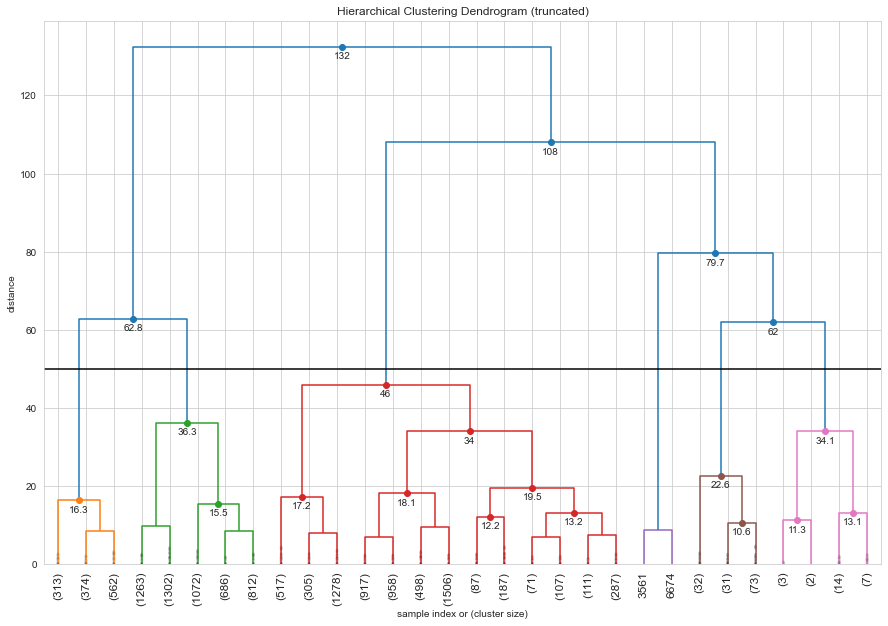

In [81]:
linked_array = ward(temp_scaled)
fancy_dendrogram(linked_array, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10, max_d=50)
plt.show()

In [82]:
## Determine the total number of clusters and the elements of each cluster and the percetage of reorder frequency
max_d = 50
clusters = fcluster(linked_array, max_d, criterion='distance')
labels, counts = np.unique(clusters, return_counts=True)
temp['clusters'] = clusters
print('reorder rates for each cluster\n')
for i in range(1,len(np.unique(clusters))+1):
    print('\nlabel: {}'.format(i))
    print('n: {}'.format(counts[i-1]))
    print('rr: {}'.format(round(temp[temp['clusters'] == i].reorder_rate.mean()*100, 2))) 

reorder rates for each cluster


label: 1
n: 1249
rr: 17.08

label: 2
n: 5135
rr: 41.68

label: 3
n: 6829
rr: 64.75

label: 4
n: 2
rr: 87.37

label: 5
n: 136
rr: 68.29

label: 6
n: 26
rr: 73.04


In [83]:
## Displaying the elements of the clusters
display(temp[clusters == 4])

,product_id,count,reorder_rate,add_to_cart_mean,order_dow,order_hour_of_day,days_since_prior_order,clusters
13176,13177,15480,0.863178,4.763501,2.799225,13.432752,11.211426,4
24852,24853,18726,0.884172,4.959415,2.772135,13.434156,11.045400,4
